In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.style.use('ggplot')
%matplotlib inline

#foods are rated out of 5. high protein and low calorie foods should be 'healthier.
# Based on the rating given, remove the NaNs so as to classify the food better?



In [13]:

data = pd.read_csv('epi_r.csv')
#print(data.info())
#20052 x 680
data = data[['title','rating', 'calories', 'protein', 'fat', 'sodium']]
# for i in data:
#     data.fillna(data[i,x].mean()*data[i,'rating'] for x in data[i], inplace=True)
#rating of 2.5 = mean
#mean_c = data['calories'].mean() the mean is too high..calories per 100gm should give better results

In [14]:
#using quantile
data1 = data.loc[data['calories'].notnull()]
q1,q2 = data1['calories'].quantile(.10), data['calories'].quantile(.90)
delta = q2-q1
for i in data.columns[1:-1]:
    data[i].fillna(data1.loc[(data1['calories'] > q1) & (data1['calories'] < q2)][i].mean() * data['rating']/2.5, inplace=True)


In [15]:
#removing outliers
data = data.loc[(data['calories'] > q1 - delta ) & (data['calories'] < q2 + delta)]
data.sort(['rating'], ascending = False, inplace = True)

data_5 = data.loc[data['rating'] == 5]
tt = pd.qcut(data_5['calories'], [0,.25,.75,1], labels = ['low', 'medium', 'high']).rename('calass')
data_5 = data_5.join(tt)

low = data_5.loc[data_5['calass'] == 'low']

/home/beautifulsoup4/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


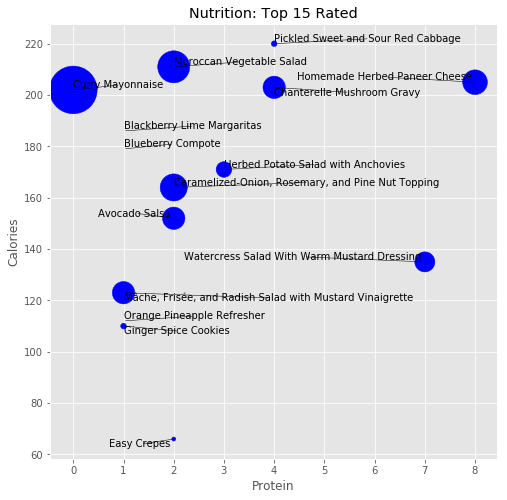

In [17]:
top_30 = (low.drop_duplicates(['title']).head(15).values)
fig,ax = plt.subplots(figsize = (8,8))
color = top_30[:,4].T
#color = [str(item/255.) for item in top_30[:,4]]
ax.scatter(top_30[:,3], top_30[:,2],s = [color[i]**2.5 for i in range(len(color))], c = 'b')
#for i,txt in enumerate(top_30[:,0]):
 #   ax.annotate(txt,(top_30[i,3], top_30[i,2]))
texts = []
for x, y, s in zip(top_30[:,3], top_30[:,2], top_30[:,0]):
    texts.append(plt.text(x, y, s))

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))


ax.set_title('Nutrition: Top 15 Rated')
ax.set_xlabel('Protein')
ax.set_ylabel('Calories')